In [2]:
import pandas as pd

# 파일을 로드
cleaned_df = pd.read_csv('C:/Users/82106/Desktop/경영 캡스톤 프로젝트2/cleaned_data.csv')


### 변수 6개로 계층적 클러스터링 

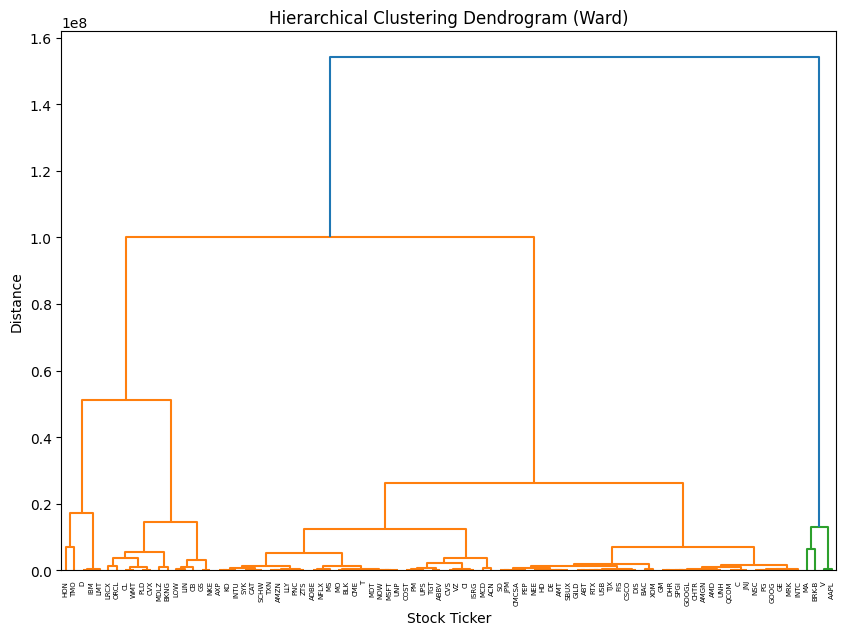

In [3]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 클러스터링을 위해 필요한 열 선택
data_for_clustering = cleaned_df[['PER', 'DividendYield', 'Beta','RSI','volume','Volatility']]

# 계층적 클러스터링 수행 (와드 연결 기법 사용)
linked = linkage(data_for_clustering, method='ward')

# 덴드로그램으로 결과 시각화
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=cleaned_df['Ticker'].values,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Stock Ticker')
plt.ylabel('Distance')
plt.show()


### 최적의 클러스터수를 정하기 위한 실루엣 스코어 시각화

In [4]:
data_for_clustering

,PER,DividendYield,Beta,RSI,volume,Volatility
0,28.970451,0.55,1.264,60.891036,6.888900e+07,0.012570
1,35.882050,0.72,0.893,61.321318,6.343245e+06,0.015824
2,52.407307,0.00,1.155,61.228543,5.172203e+06,0.020805
3,25.901989,0.47,1.019,53.160397,3.051076e+06,0.019149
4,26.211655,0.47,1.019,53.086364,3.502121e+06,0.019283
...,...,...,...,...,...,...
86,23.908884,4.15,0.488,51.810189,6.287800e+06,0.011325
87,29.987300,2.10,0.394,64.148240,2.044373e+07,0.010355
88,31.485380,3.57,1.058,63.595179,1.963317e+07,0.016672
89,33.239790,0.87,1.511,62.697293,1.699392e+07,0.022521


In [5]:
print("Data for clustering shape:", data_for_clustering.shape)
print("Labels shape:", cleaned_df['Ticker'].shape)

Data for clustering shape: (91, 6)
Labels shape: (91,)


### 계층적 클러스터링 와드기법 재수행

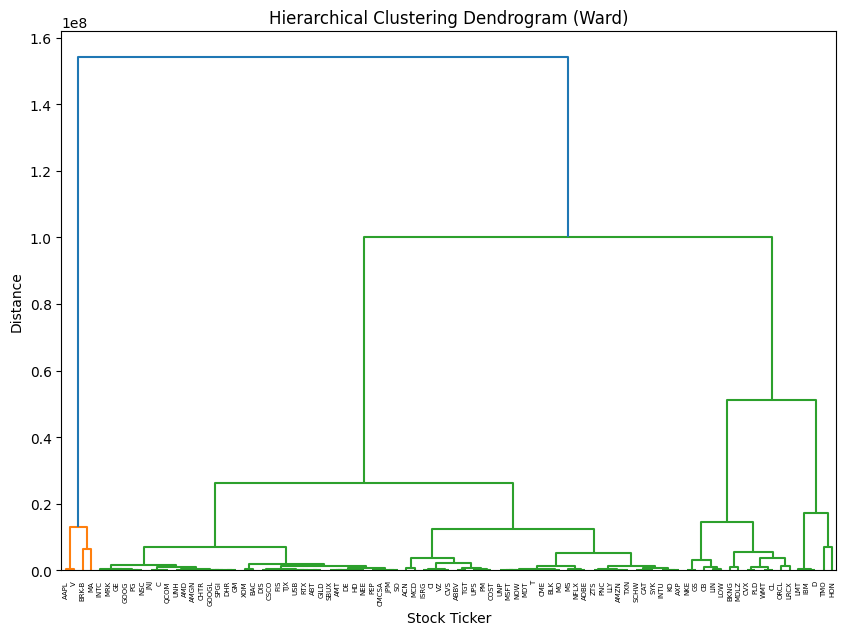

In [6]:
# 데이터 준비 및 결측치 제거
cleaned_df = cleaned_df.dropna(subset=['PER', 'DividendYield', 'Beta','RSI','volume','Volatility'])
data_for_clustering = cleaned_df[['PER', 'DividendYield', 'Beta','RSI','volume','Volatility']]

# 계층적 클러스터링 수행
linked = linkage(data_for_clustering, method='ward')

# 덴드로그램 생성
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=cleaned_df['Ticker'].values, orientation='top')
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Stock Ticker')
plt.ylabel('Distance')
plt.show()

### 최적의 클러스터수를 찾기위한 실루엣 점수 시각화

Number of clusters: 2, Silhouette Score: 0.8176870255743246
Number of clusters: 3, Silhouette Score: 0.7276148813784945
Number of clusters: 4, Silhouette Score: 0.7278053535031441
Number of clusters: 5, Silhouette Score: 0.6113949066162614
Number of clusters: 6, Silhouette Score: 0.6104560780375955
Number of clusters: 7, Silhouette Score: 0.6025727373212157
Number of clusters: 8, Silhouette Score: 0.6010178583067188
Number of clusters: 9, Silhouette Score: 0.6158090280081406
Number of clusters: 10, Silhouette Score: 0.6084271930766523
Number of clusters: 11, Silhouette Score: 0.6001924499050482
Number of clusters: 12, Silhouette Score: 0.5968166691187116
Number of clusters: 13, Silhouette Score: 0.5886774018712587
Number of clusters: 14, Silhouette Score: 0.6246450906057925
Number of clusters: 15, Silhouette Score: 0.6256519533426181
Number of clusters: 16, Silhouette Score: 0.6282408909289029
Number of clusters: 17, Silhouette Score: 0.6418370846723385
Number of clusters: 18, Silhouet

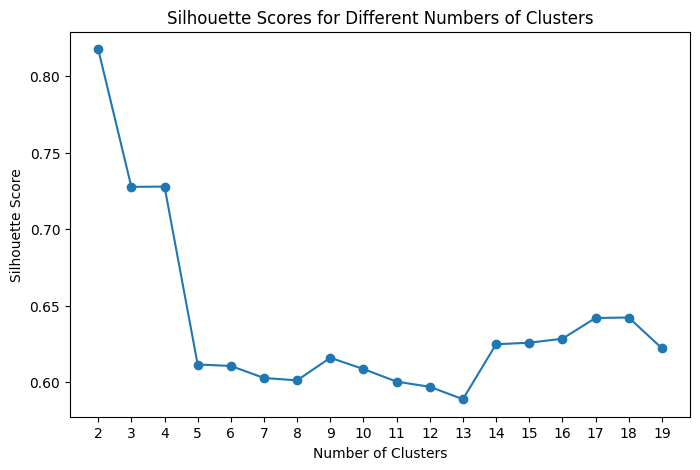

In [7]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

# 클러스터 범위 설정 및 실루엣 점수 계산
cluster_range = range(2, 20)
silhouette_scores = []

for n_clusters in cluster_range:
    labels = fcluster(linked, n_clusters, criterion='maxclust')
    if len(labels) == len(data_for_clustering):
        score = silhouette_score(data_for_clustering, labels)
        silhouette_scores.append(score)
        print(f"Number of clusters: {n_clusters}, Silhouette Score: {score}")
    else:
        print(f"Mismatch in number of labels and samples for {n_clusters} clusters. Expected {len(data_for_clustering)} got {len(labels)}")

# 실루엣 점수 그래프 표시
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xticks(cluster_range)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

클러스터수는 2이나 4또는 9,14,15,16,17,18일때가 점수가 높은축에 속하기 때문에 이중에 하나를 골라야한다.

적절히 클러스터링이 되고 점수가 높은 4로 선택한다. 

### 여러 클러스터 기법을 사용하여 분산이 잘된 클러스터 기법 탐색하기 

### 계층적 클러스터링 와드기법

In [8]:
from scipy.cluster.hierarchy import fcluster

# 클러스터링을 위해 필요한 열 선택
# 이전 단계에서 정의된 'data_for_clustering'와 'linked'를 사용
data_for_clustering = cleaned_df[['PER', 'DividendYield', 'Beta','RSI','volume','Volatility']]
linked = linkage(data_for_clustering, method='ward')

# 9개의 클러스터로 클러스터링 수행
cluster_labels = fcluster(linked, 4, criterion='maxclust')

# 클러스터 레이블을 데이터프레임에 추가
cleaned_df['Cluster_Labels'] = cluster_labels

# 클러스터 레이블별로 개수 확인
cluster_counts1 = cleaned_df['Cluster_Labels'].value_counts()

# 클러스터링 결과 및 개수 출력
print(cluster_counts1)


Cluster_Labels
2    69
3    13
4     5
1     4
Name: count, dtype: int64


### KMeans 클러스터링

In [9]:
from sklearn.cluster import KMeans

# 클러스터링을 위한 데이터 준비
# 이전에 정의된 'data_for_clustering'을 사용
data_for_clustering = cleaned_df[['PER', 'DividendYield', 'Beta','RSI','volume','Volatility']]

# KMeans 모델 생성 및 클러스터링 수행
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_for_clustering)

# 클러스터 레이블을 데이터프레임에 추가
cleaned_df['Cluster_Labels'] = kmeans.labels_

# 클러스터 레이블별로 개수 확인
cluster_counts2 = cleaned_df['Cluster_Labels'].value_counts()

# 클러스터링 결과 및 개수 출력
print(cluster_counts2)

Cluster_Labels
0    69
2    13
3     5
1     4
Name: count, dtype: int64


### DBSCAN 클러스터링 

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# DBSCAN 클러스터링 수행
# 'eps'와 'min_samples' 값은 데이터에 따라 조정
db = DBSCAN(eps=0.5, min_samples=100)
clusters = db.fit_predict(data_for_clustering)

# 클러스터 레이블을 데이터프레임에 추가
cleaned_df['DBSCAN_Cluster'] = clusters

# 결과 클러스터 수 확인
unique_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # 노이즈를 제외한 클러스터 수 계산
print(f"Unique clusters (excluding noise): {unique_clusters}")

# 클러스터 레이블별로 개수 확인
cluster_counts3 = pd.Series(clusters).value_counts()
print("Cluster counts (including noise):")
print(cluster_counts3)


Unique clusters (excluding noise): 0
Cluster counts (including noise):
-1    91
Name: count, dtype: int64


### MeanShift 클러스터링

In [11]:
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler

# Mean Shift 클러스터링 수행
mean_shift = MeanShift(bandwidth=None)  # bandwidth가 None이면, estimate_bandwidth 함수를 사용하여 자동으로 추정.
mean_shift.fit(data_for_clustering)

# 클러스터 레이블을 데이터프레임에 추가
cleaned_df['Cluster_Labels'] = mean_shift.labels_

# 클러스터 중심 출력
print("Cluster centers:")
print(mean_shift.cluster_centers_)

# 클러스터 레이블별로 개수 확인
cluster_counts4 = cleaned_df['Cluster_Labels'].value_counts()

# 클러스터링 결과 및 개수 출력
print("Cluster counts:")
print(cluster_counts4)

Cluster centers:
[[3.84602640e+01 2.33449272e+00 9.28507246e-01 6.00617295e+01
  4.41001157e+06 1.59991277e-02]
 [2.54497233e+01 1.94533336e+00 9.76866667e-01 6.12801418e+01
  1.68630115e+07 1.43112492e-02]
 [2.41279770e+01 4.30000000e-01 1.03700000e+00 6.05479875e+01
  6.66216608e+07 1.03320494e-02]
 [1.97162230e+01 3.90666673e+00 5.95000000e-01 6.23817050e+01
  3.24532559e+07 1.21129550e-02]
 [3.07540380e+01 1.19500005e+00 9.08000000e-01 6.17637770e+01
  4.35496121e+07 1.29387696e-02]
 [2.42718360e+01 2.90000000e-01 9.84500000e-01 5.82670250e+01
  5.94389702e+07 9.72433502e-03]]
Cluster counts:
Cluster_Labels
0    68
1    14
3     3
2     2
5     2
4     2
Name: count, dtype: int64


### GMM 클러스터링

In [12]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# GMM 클러스터링 수행
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(data_for_clustering)

# 클러스터 레이블을 데이터프레임에 추가
cleaned_df['Cluster_Labels'] = gmm.predict(data_for_clustering)

# 클러스터링 결과 확인
print(cleaned_df['Cluster_Labels'].value_counts())

# 클러스터 레이블별로 개수 확인
cluster_counts5 = cleaned_df['Cluster_Labels'].value_counts()


Cluster_Labels
2    50
0    32
3     5
1     4
Name: count, dtype: int64


### Spectral 클러스터링

In [13]:
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

# Spectral 클러스터링 수행
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
cleaned_df['Spectral_Cluster'] = spectral.fit_predict(data_for_clustering)

# 클러스터별로 개수 확인
spectral_counts = cleaned_df['Spectral_Cluster'].value_counts()
print("Spectral Clustering counts:")
print(spectral_counts)


Spectral Clustering counts:
Spectral_Cluster
1    28
2    22
3    22
0    19
Name: count, dtype: int64


### Affinity Propagation 클러스터링

In [14]:
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler

# Affinity Propagation 클러스터링 수행
affinity = AffinityPropagation(random_state=42)
cleaned_df['Affinity_Cluster'] = affinity.fit_predict(data_for_clustering)

# 클러스터별로 개수 확인
affinity_counts = cleaned_df['Affinity_Cluster'].value_counts()
print("Affinity Propagation counts:")
print(affinity_counts)


Affinity Propagation counts:
Affinity_Cluster
10    22
7     20
8     16
3     11
11     7
9      6
4      3
1      2
0      1
2      1
5      1
6      1
Name: count, dtype: int64


### Agglomerative 클러스터링

In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Agglomerative 클러스터링 수행
agglomerative = AgglomerativeClustering(n_clusters=4)
cleaned_df['Agglomerative_Cluster'] = agglomerative.fit_predict(data_for_clustering)

# 클러스터별로 개수 확인
agglomerative_counts = cleaned_df['Agglomerative_Cluster'].value_counts()
print("Agglomerative Clustering counts:")
print(agglomerative_counts)


Agglomerative Clustering counts:
Agglomerative_Cluster
0    69
1    13
2     5
3     4
Name: count, dtype: int64


### 각 클러스터링 기법의 분산을 비교

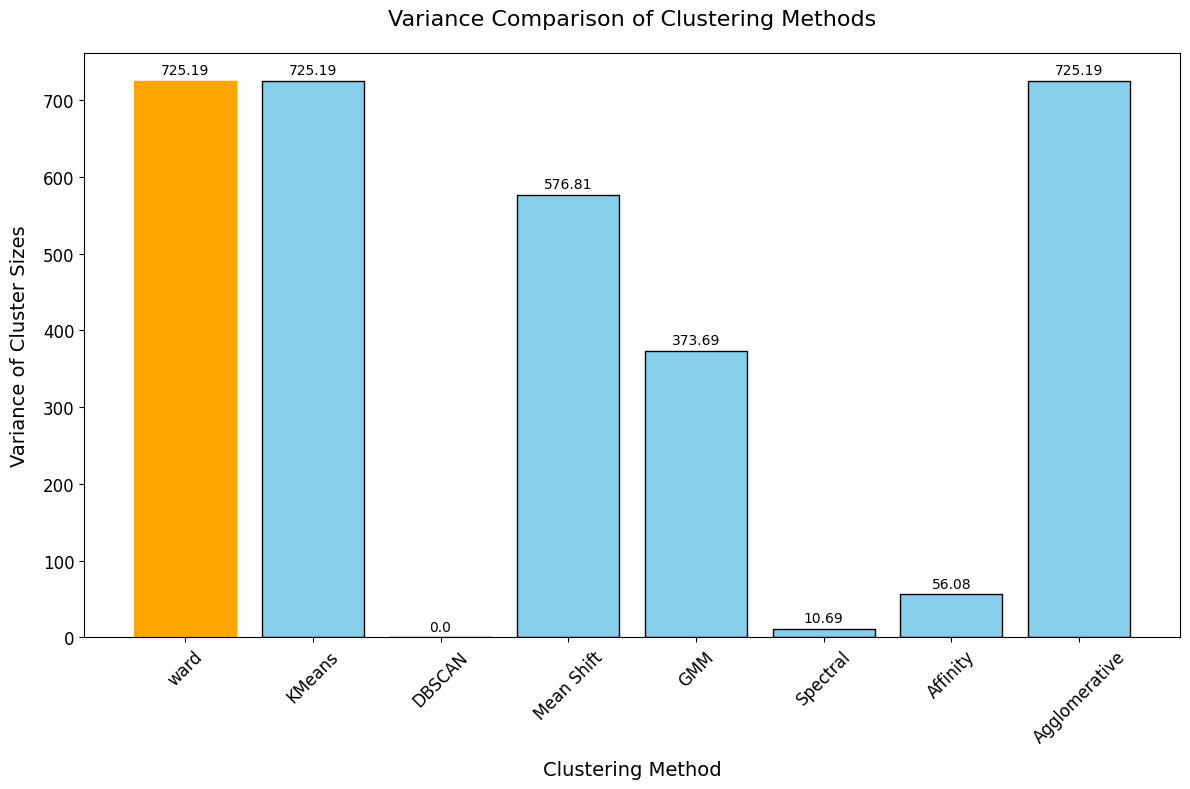

In [16]:
import numpy as np

# 클러스터 크기 데이터
cluster_sizes = [
    cluster_counts1, cluster_counts2, cluster_counts3,
    cluster_counts4, cluster_counts5, spectral_counts,
    affinity_counts, agglomerative_counts
]

# 클러스터링 방법 이름
methods = ['ward', 'KMeans', 'DBSCAN', 'Mean Shift', 'GMM', 
           'Spectral', 'Affinity', 'Agglomerative']

# 분산 계산
variances = [np.var(sizes) for sizes in cluster_sizes]

# 분산 시각화
plt.figure(figsize=(12, 8))
bars = plt.bar(methods, variances, color='skyblue', edgecolor='black')

# 하이라이트를 위한 최대 분산 바의 색상 변경
max_variance_index = np.argmax(variances)
bars[max_variance_index].set_color('orange')

# 각 바에 값 라벨 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

# 스타일링
plt.xlabel('Clustering Method', fontsize=14, labelpad=10)
plt.ylabel('Variance of Cluster Sizes', fontsize=14, labelpad=10)
plt.title('Variance Comparison of Clustering Methods', fontsize=16, pad=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

이 그래프를 보았을때는 DBSCAN아 값이 0인것을 감안하였을때 가장 분산차이가 적은것은 spectral 기법이라고 볼수있다.

In [17]:
# 지정된 열 삭제
cleaned_df = cleaned_df.drop(columns=['Cluster_Labels', 'Affinity_Cluster', 'DBSCAN_Cluster', 'Agglomerative_Cluster'])

# 결과 확인
print(cleaned_df)

   Ticker        RSI        volume   Beta  DividendYield        PER  \
0    AAPL  60.891036  6.888900e+07  1.264           0.55  28.970451   
1    MSFT  61.321318  6.343245e+06  0.893           0.72  35.882050   
2    AMZN  61.228543  5.172203e+06  1.155           0.00  52.407307   
3   GOOGL  53.160397  3.051076e+06  1.019           0.47  25.901989   
4    GOOG  53.086364  3.502121e+06  1.019           0.47  26.211655   
..    ...        ...           ...    ...            ...        ...   
86    CME  51.810189  6.287800e+06  0.488           4.15  23.908884   
87     CL  64.148240  2.044373e+07  0.394           2.10  29.987300   
88    PLD  63.595179  1.963317e+07  1.058           3.57  31.485380   
89   LRCX  62.697293  1.699392e+07  1.511           0.87  33.239790   
90     SO  59.866619  2.172282e+06  0.476           3.69  20.388601   

    Volatility  Spectral_Cluster  
0     0.012570                 2  
1     0.015824                 3  
2     0.020805                 1  
3     0

### Spectral 클러스터 후 시각화

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Spectral 클러스터링 수행
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', n_neighbors=10, random_state=42)
labels = spectral.fit_predict(data_for_clustering)

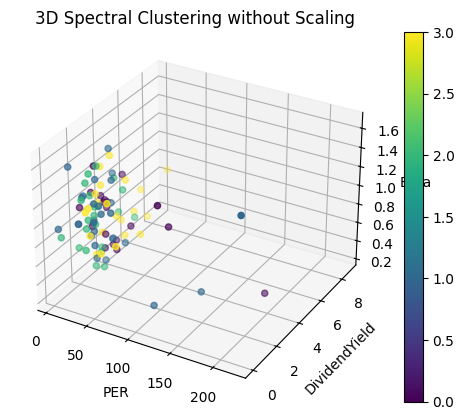

In [19]:
# 3D 플롯으로 클러스터링 결과 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_for_clustering['PER'], data_for_clustering['DividendYield'], data_for_clustering['Beta'], c=labels, cmap='viridis')

# 레이블 및 타이틀
ax.set_title('3D Spectral Clustering without Scaling')
ax.set_xlabel('PER')
ax.set_ylabel('DividendYield')
ax.set_zlabel('Beta')
plt.colorbar(scatter)
plt.show()

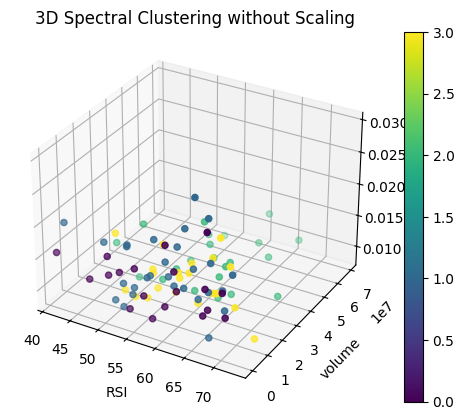

In [20]:
# 3D 플롯으로 클러스터링 결과 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_for_clustering['RSI'], data_for_clustering['volume'], data_for_clustering['Volatility'], c=labels, cmap='viridis')

# 레이블 및 타이틀
ax.set_title('3D Spectral Clustering without Scaling')
ax.set_xlabel('RSI')
ax.set_ylabel('volume')
ax.set_zlabel('Volatility')
plt.colorbar(scatter)
plt.show()

### 각 클러스터의 변수 경계값 

In [21]:
# 클러스터링 결과를 데이터프레임에 추가
data_for_clustering['Cluster'] = labels

# 클러스터 중심 및 경계 계산
# 각 클러스터에 대한 각 변수의 중앙값을 계산
centroids = data_for_clustering.groupby('Cluster').median()

# 각 클러스터에 대한 각 변수의 최소 및 최대값을 계산하여 경계를 정의
boundaries = data_for_clustering.groupby('Cluster').agg(['min', 'max'])

print("Centroids:")
print(centroids)
print("\nBoundaries:")
print(boundaries)

Centroids:
               PER  DividendYield   Beta        RSI        volume  Volatility
Cluster                                                                      
0        20.986225          2.790  0.947  59.866619  1.521273e+06    0.015031
1        31.267589          1.235  1.019  60.194904  3.553733e+06    0.016248
2        27.733320          1.500  0.985  62.047574  2.119128e+07    0.012701
3        23.687010          2.630  0.844  62.113283  7.492383e+06    0.014922

Boundaries:
               PER             DividendYield             Beta         \
               min         max           min       max    min    max   
Cluster                                                                
0        10.530504  187.611100          0.85  4.680000  0.235  1.395   
1         5.515263  221.411760          0.00  3.930000  0.371  1.660   
2        11.312888   37.865383          0.00  5.030000  0.394  1.511   
3         9.279570   78.171300          0.00  8.729999  0.405  1.398   

   

Spectral_Cluster 칼럼 이름을 Cluster 으로 바꾸기

In [22]:
cleaned_df.rename(columns={'Spectral_Cluster': 'Cluster'}, inplace=True)